# Confirmatory Data Analysis 
> Using traditional statistical tools such as significance, confidence, and inference to test the influence of code conceps in performance. 

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<ipython-input-1-ac09909db896>:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
#! pip install dowhy
from dowhy import CausalModel
import dowhy.datasets

In [3]:
from pathlib import Path
import csv
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import functools

pd.options.display.float_format = '{:.2f}'.format

In [4]:
import seaborn as sns
sns.set_theme(style="darkgrid")


In [5]:
%matplotlib inline

## Load Data Samples

In [6]:
#Load data samples
path = '/workspaces/CodeCheckList/data/linguistic_capabilities/huggingface-CodeBERTa-small-v1_100.0_20.csv'
#path = '/workspaces/CodeCheckList/data/linguistic_capabilities/microsoft-codebert-base-mlm_100.0_20.csv'
eval_df = pd.read_csv(path,index_col=0)
eval_df = eval_df.loc[eval_df['sample_id'] <= 7500]

In [7]:
eval_df.head(2)

,sample_id,ast_element,sample,masking_rate,numper_of_masked_tokens,ast_element_ocurrences,mask_jaccard,mask_sorensen_dice,mask_levenshtein,mask_random_avg_jaccard,...,mask_random_std_jaccard,mask_random_std_sorensen_dice,mask_random_std_levenshtein,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes
0,0,comparison_operator,def test_should_generate_secret_with_specified...,1.00,20,1,0.85,0.92,0.90,0.98,...,0.03,0.01,0.02,0,15,29,1,15,50,96
1,0,identifier,def test_should_generate_secret_with_specified...,1.00,24,9,0.82,0.90,0.83,0.94,...,0.05,0.03,0.04,0,15,29,1,15,50,96


In [8]:
eval_df.describe()

,sample_id,masking_rate,numper_of_masked_tokens,ast_element_ocurrences,mask_jaccard,mask_sorensen_dice,mask_levenshtein,mask_random_avg_jaccard,mask_random_avg_sorensen_dice,mask_random_avg_levenshtein,mask_random_std_jaccard,mask_random_std_sorensen_dice,mask_random_std_levenshtein,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes
count,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00,30132.00
mean,3893.06,1.00,37.28,8.74,0.78,0.85,0.78,0.88,0.92,0.87,0.07,0.05,0.07,0.04,11.75,40.17,2.65,12.95,89.79,144.76
std,2175.47,0.00,51.25,16.27,0.21,0.17,0.22,0.15,0.10,0.16,0.07,0.06,0.07,0.25,3.07,33.32,2.57,10.34,70.72,106.94
min,0.00,1.00,1.00,1.00,0.02,0.04,0.02,0.08,0.14,0.08,0.00,0.00,0.00,0.00,4.00,2.00,1.00,1.00,5.00,8.00
25%,2004.00,1.00,7.00,1.00,0.67,0.80,0.68,0.80,0.88,0.79,0.02,0.01,0.02,0.00,10.00,16.00,1.00,5.00,38.00,62.00
50%,4009.00,1.00,16.00,1.00,0.83,0.91,0.84,0.95,0.97,0.95,0.06,0.03,0.06,0.00,12.00,29.00,2.00,10.00,72.00,117.00
75%,5793.00,1.00,46.00,7.00,0.95,0.97,0.96,0.99,1.00,0.99,0.11,0.08,0.11,0.00,14.00,56.00,3.00,18.00,123.00,202.00
max,7500.00,1.00,469.00,156.00,1.00,1.00,1.00,1.00,1.00,1.00,0.43,0.43,0.43,19.00,27.00,214.00,45.00,169.00,1124.00,623.00


In [9]:
eval_df.columns

Index(['sample_id', 'ast_element', 'sample', 'masking_rate',
       'numper_of_masked_tokens', 'ast_element_ocurrences', 'mask_jaccard',
       'mask_sorensen_dice', 'mask_levenshtein', 'mask_random_avg_jaccard',
       'mask_random_avg_sorensen_dice', 'mask_random_avg_levenshtein',
       'mask_random_std_jaccard', 'mask_random_std_sorensen_dice',
       'mask_random_std_levenshtein', 'n_ast_errors', 'ast_levels',
       'n_whitespaces_', 'complexity', 'nloc', 'token_counts', 'n_ast_nodes'],
      dtype='object')

In [10]:
set(eval_df['ast_element'])

{'boolean_operator',
 'comparison_operator',
 'for_in_clause',
 'for_statement',
 'identifier',
 'if_clause',
 'if_statement',
 'parameters',
 'return_statement',
 'string',
 'while_statement'}

## Concept-Level Analysis

### Jaccard Metric

In [11]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].groupby('ast_element').describe()

mask_jaccard                                     \
                           count mean  std  min  25%  50%  75%  max   
ast_element                                                           
boolean_operator          551.00 0.83 0.15 0.15 0.77 0.87 0.93 0.99   
comparison_operator      2972.00 0.84 0.14 0.13 0.78 0.89 0.94 1.00   
for_in_clause             576.00 0.87 0.10 0.29 0.83 0.90 0.95 1.00   
for_statement             859.00 0.55 0.22 0.08 0.38 0.55 0.73 0.95   
identifier               7501.00 0.80 0.17 0.03 0.74 0.83 0.91 1.00   
if_clause                 125.00 0.90 0.08 0.51 0.86 0.92 0.96 1.00   
if_statement             2039.00 0.51 0.22 0.07 0.33 0.51 0.69 0.97   
parameters               7501.00 0.84 0.23 0.02 0.76 0.95 1.00 1.00   
return_statement         2897.00 0.77 0.23 0.05 0.61 0.84 0.98 1.00   
string                   5033.00 0.75 0.17 0.11 0.64 0.77 0.88 1.00   
while_statement            78.00 0.57 0.25 0.11 0.34 0.53 0.81 0.95   

                    mask_random_avg_jaccard                                     
                                      count mean  std  min  25%  50%  75%  max  
ast_element                                                                     
boolean_operator                     551.00 0.95 0.08 0.45 0.95 0.98 0.99 1.00  
comparison_operator                 2972.00 0.94 0.10 0.26 0.95 0.98 0.99 1.00  
for_in_clause                        576.00 0.98 0.04 0.61 0.97 0.99 1.00 1.00  
for_statement                        859.00 0.79 0.18 0.23 0.67 0.83 0.94 1.00  
identifier                          7501.00 0.78 0.12 0.24 0.71 0.79 0.86 1.00  
if_clause                            125.00 0.98 0.03 0.77 0.98 0.99 1.00 1.00  
if_statement                        2039.00 0.74 0.20 0.14 0.59 0.79 0.92 1.00  
parameters                          7501.00 0.97 0.06 0.37 0.97 0.99 1.00 1.00  
return_statement                    2897.00 0.88 0.17 0.13 0.79 0.97 1.00 1.00  
string                              5033.00 0.91 0.13 0.08 0.88 0.96 0.99 1.00  
while_statement                       78.00 0.78 0.20 0.34 0.65 0.82 0.95 1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

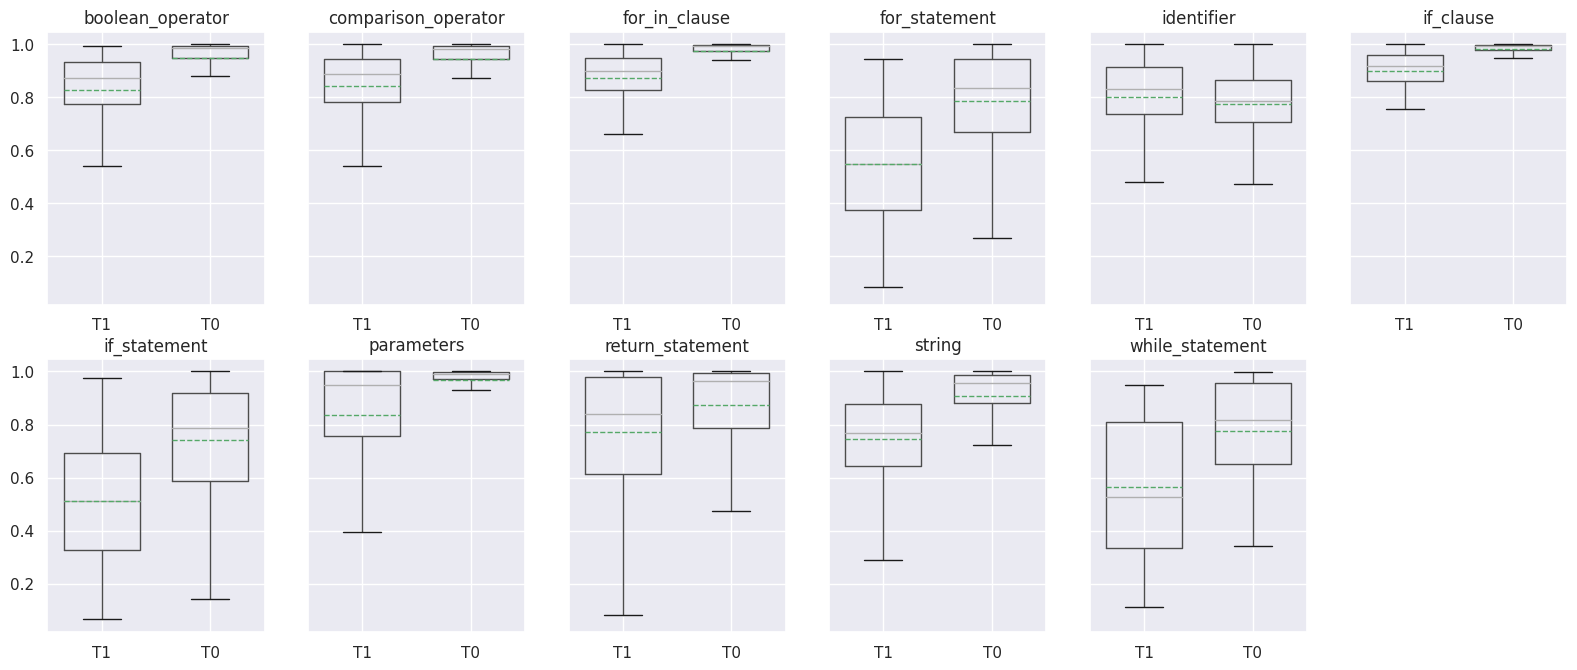

In [12]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].rename(
    columns={'mask_jaccard': 'T1', 'mask_random_avg_jaccard': 'T0'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

boolean_operator         AxesSubplot(0.1,0.559091;0.114286x0.340909)
for_in_clause       AxesSubplot(0.237143,0.559091;0.114286x0.340909)
if_clause           AxesSubplot(0.374286,0.559091;0.114286x0.340909)
if_statement        AxesSubplot(0.511429,0.559091;0.114286x0.340909)
return_statement    AxesSubplot(0.648571,0.559091;0.114286x0.340909)
while_statement     AxesSubplot(0.785714,0.559091;0.114286x0.340909)
dtype: object

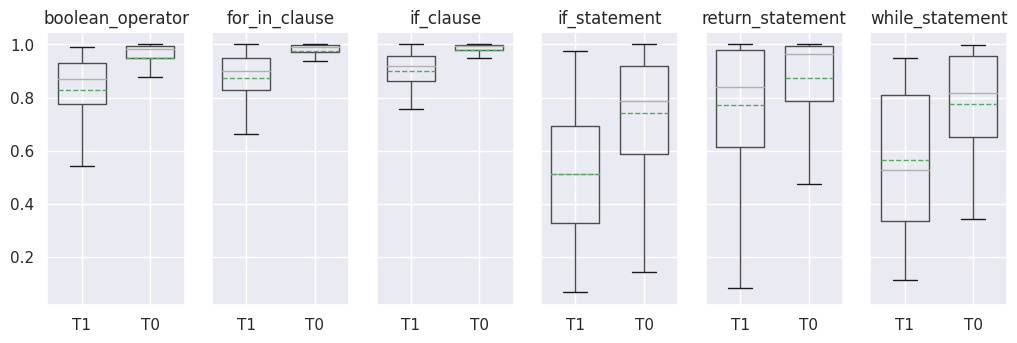

In [39]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].loc[eval_df['ast_element'].isin(['comparison_operator', 'for_statement', 'identifier', 'parameters', 'string'])].rename(
    columns={'mask_jaccard': 'T1', 'mask_random_avg_jaccard': 'T0'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(12,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

In [13]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].loc[~eval_df['ast_element'].isin(['for_in_clause', 'if_clause', 'for_statement'])].groupby('ast_element').describe()

mask_jaccard                                     \
                           count mean  std  min  25%  50%  75%  max   
ast_element                                                           
boolean_operator          551.00 0.83 0.15 0.15 0.77 0.87 0.93 0.99   
comparison_operator      2972.00 0.84 0.14 0.13 0.78 0.89 0.94 1.00   
identifier               7501.00 0.80 0.17 0.03 0.74 0.83 0.91 1.00   
if_statement             2039.00 0.51 0.22 0.07 0.33 0.51 0.69 0.97   
parameters               7501.00 0.84 0.23 0.02 0.76 0.95 1.00 1.00   
return_statement         2897.00 0.77 0.23 0.05 0.61 0.84 0.98 1.00   
string                   5033.00 0.75 0.17 0.11 0.64 0.77 0.88 1.00   
while_statement            78.00 0.57 0.25 0.11 0.34 0.53 0.81 0.95   

                    mask_random_avg_jaccard                                     
                                      count mean  std  min  25%  50%  75%  max  
ast_element                                                                     
boolean_operator                     551.00 0.95 0.08 0.45 0.95 0.98 0.99 1.00  
comparison_operator                 2972.00 0.94 0.10 0.26 0.95 0.98 0.99 1.00  
identifier                          7501.00 0.78 0.12 0.24 0.71 0.79 0.86 1.00  
if_statement                        2039.00 0.74 0.20 0.14 0.59 0.79 0.92 1.00  
parameters                          7501.00 0.97 0.06 0.37 0.97 0.99 1.00 1.00  
return_statement                    2897.00 0.88 0.17 0.13 0.79 0.97 1.00 1.00  
string                              5033.00 0.91 0.13 0.08 0.88 0.96 0.99 1.00  
while_statement                       78.00 0.78 0.20 0.34 0.65 0.82 0.95 1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

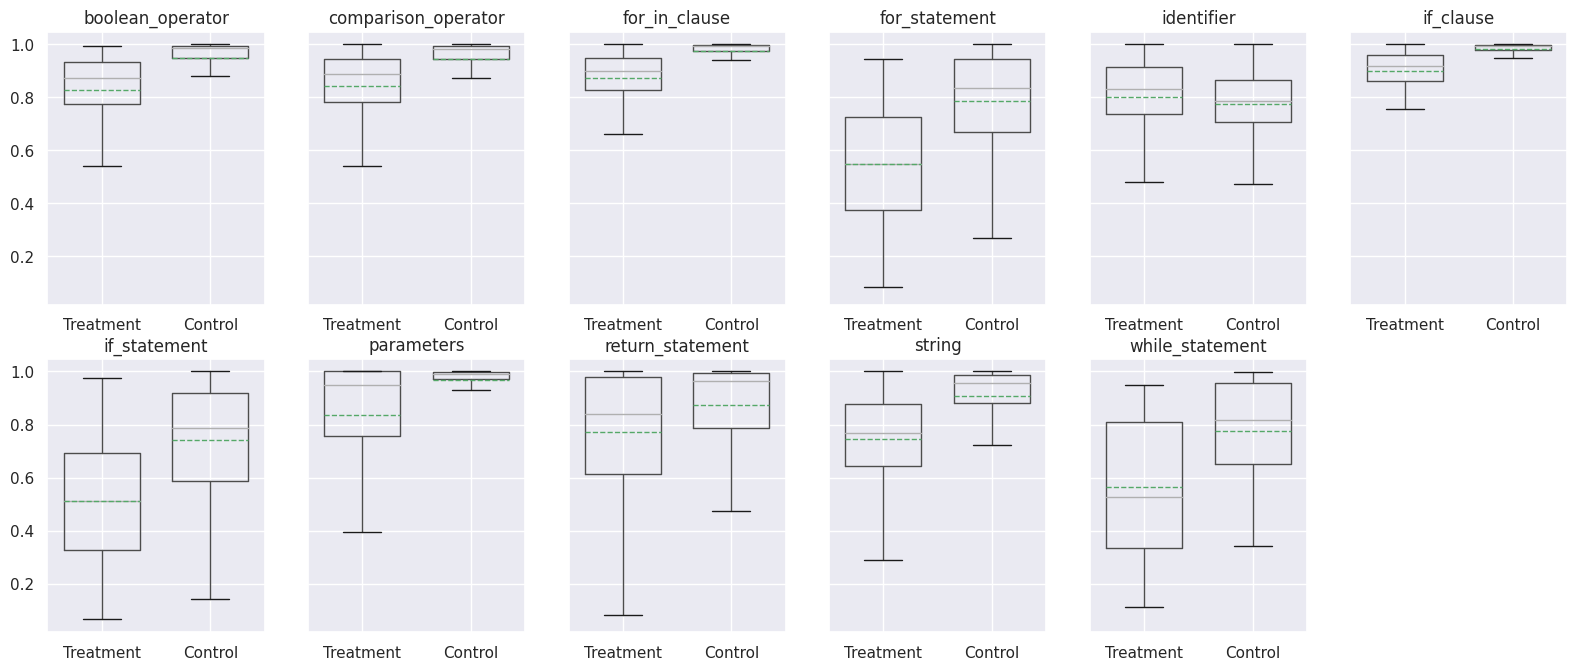

In [14]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','ast_element']].rename(
    columns={'mask_jaccard': 'Treatment', 'mask_random_avg_jaccard': 'Control'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

### Levenshtein Metric

In [15]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein','ast_element']].groupby('ast_element').describe()

mask_levenshtein                                     \
                               count mean  std  min  25%  50%  75%  max   
ast_element                                                               
boolean_operator              551.00 0.84 0.14 0.21 0.80 0.89 0.94 0.99   
comparison_operator          2972.00 0.86 0.14 0.14 0.80 0.91 0.96 1.00   
for_in_clause                 576.00 0.89 0.10 0.29 0.85 0.92 0.96 1.00   
for_statement                 859.00 0.57 0.22 0.08 0.40 0.58 0.75 0.96   
identifier                   7501.00 0.78 0.18 0.03 0.70 0.80 0.91 1.00   
if_clause                     125.00 0.91 0.08 0.57 0.87 0.93 0.96 1.00   
if_statement                 2039.00 0.52 0.23 0.07 0.33 0.53 0.71 0.98   
parameters                   7501.00 0.85 0.23 0.02 0.76 0.96 1.00 1.00   
return_statement             2897.00 0.79 0.23 0.05 0.63 0.87 0.99 1.00   
string                       5033.00 0.77 0.16 0.13 0.67 0.80 0.90 1.00   
while_statement                78.00 0.58 0.25 0.12 0.33 0.55 0.83 0.96   

                    mask_random_avg_levenshtein                                \
                                          count mean  std  min  25%  50%  75%   
ast_element                                                                     
boolean_operator                         551.00 0.95 0.09 0.41 0.95 0.99 1.00   
comparison_operator                     2972.00 0.94 0.11 0.19 0.95 0.99 1.00   
for_in_clause                            576.00 0.98 0.04 0.49 0.98 0.99 1.00   
for_statement                            859.00 0.76 0.21 0.19 0.62 0.83 0.94   
identifier                              7501.00 0.76 0.13 0.26 0.67 0.77 0.86   
if_clause                                125.00 0.98 0.03 0.79 0.98 0.99 1.00   
if_statement                            2039.00 0.71 0.24 0.13 0.52 0.78 0.92   
parameters                              7501.00 0.97 0.06 0.40 0.98 0.99 1.00   
return_statement                        2897.00 0.88 0.17 0.15 0.80 0.97 1.00   
string                                  5033.00 0.90 0.13 0.08 0.88 0.96 0.99   
while_statement                           78.00 0.74 0.24 0.27 0.57 0.81 0.96   

                          
                     max  
ast_element               
boolean_operator    1.00  
comparison_operator 1.00  
for_in_clause       1.00  
for_statement       1.00  
identifier          1.00  
if_clause           1.00  
if_statement        1.00  
parameters          1.00  
return_statement    1.00  
string              1.00  
while_statement     1.00

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

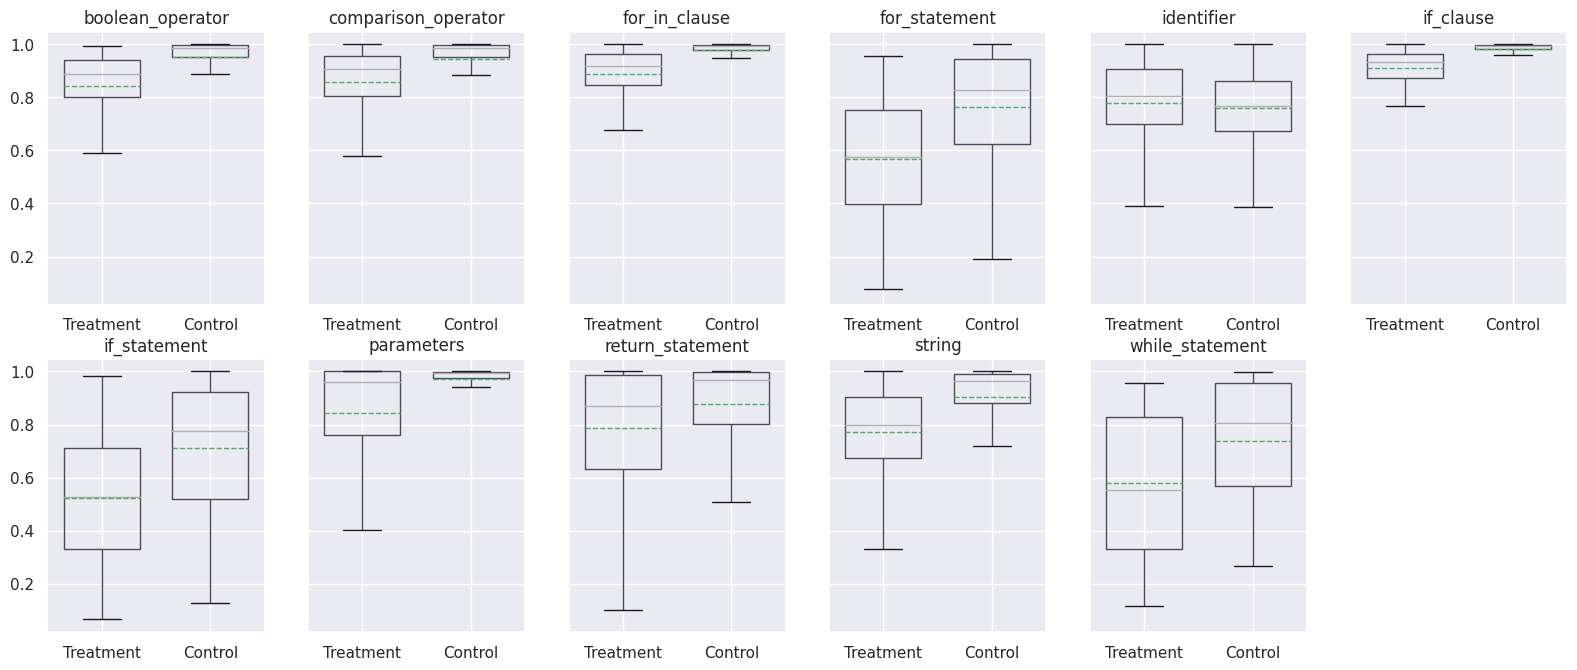

In [16]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein','ast_element']].rename(
    columns={'mask_levenshtein': 'Treatment', 'mask_random_avg_levenshtein': 'Control'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

### Soren Metric

In [17]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element']].groupby('ast_element').describe()

mask_sorensen_dice                                     \
                                 count mean  std  min  25%  50%  75%  max   
ast_element                                                                 
boolean_operator                551.00 0.90 0.11 0.27 0.87 0.93 0.96 1.00   
comparison_operator            2972.00 0.91 0.10 0.23 0.88 0.94 0.97 1.00   
for_in_clause                   576.00 0.93 0.07 0.45 0.91 0.95 0.97 1.00   
for_statement                   859.00 0.68 0.20 0.15 0.55 0.71 0.84 0.97   
identifier                     7501.00 0.88 0.14 0.05 0.85 0.91 0.95 1.00   
if_clause                       125.00 0.95 0.05 0.68 0.93 0.96 0.98 1.00   
if_statement                   2039.00 0.65 0.21 0.12 0.49 0.68 0.82 0.99   
parameters                     7501.00 0.89 0.19 0.04 0.86 0.97 1.00 1.00   
return_statement               2897.00 0.85 0.17 0.10 0.76 0.91 0.99 1.00   
string                         5033.00 0.84 0.12 0.20 0.78 0.87 0.94 1.00   
while_statement                  78.00 0.69 0.21 0.20 0.50 0.69 0.89 0.97   

                    mask_random_avg_sorensen_dice                           \
                                            count mean  std  min  25%  50%   
ast_element                                                                  
boolean_operator                           551.00 0.97 0.05 0.61 0.97 0.99   
comparison_operator                       2972.00 0.96 0.07 0.40 0.97 0.99   
for_in_clause                              576.00 0.99 0.03 0.75 0.99 1.00   
for_statement                              859.00 0.86 0.13 0.37 0.79 0.91   
identifier                                7501.00 0.86 0.09 0.38 0.82 0.87   
if_clause                                  125.00 0.99 0.02 0.86 0.99 1.00   
if_statement                              2039.00 0.83 0.15 0.25 0.73 0.87   
parameters                                7501.00 0.98 0.04 0.53 0.98 1.00   
return_statement                          2897.00 0.92 0.12 0.23 0.87 0.98   
string                                    5033.00 0.94 0.09 0.14 0.93 0.98   
while_statement                             78.00 0.85 0.14 0.50 0.78 0.88   

                               
                     75%  max  
ast_element                    
boolean_operator    1.00 1.00  
comparison_operator 1.00 1.00  
for_in_clause       1.00 1.00  
for_statement       0.97 1.00  
identifier          0.92 1.00  
if_clause           1.00 1.00  
if_statement        0.96 1.00  
parameters          1.00 1.00  
return_statement    1.00 1.00  
string              0.99 1.00  
while_statement     0.98 1.00

In [18]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element']].loc[~eval_df['ast_element'].isin(['for_in_clause', 'if_clause', 'for_statement'])].groupby('ast_element').describe()

mask_sorensen_dice                                     \
                                 count mean  std  min  25%  50%  75%  max   
ast_element                                                                 
boolean_operator                551.00 0.90 0.11 0.27 0.87 0.93 0.96 1.00   
comparison_operator            2972.00 0.91 0.10 0.23 0.88 0.94 0.97 1.00   
identifier                     7501.00 0.88 0.14 0.05 0.85 0.91 0.95 1.00   
if_statement                   2039.00 0.65 0.21 0.12 0.49 0.68 0.82 0.99   
parameters                     7501.00 0.89 0.19 0.04 0.86 0.97 1.00 1.00   
return_statement               2897.00 0.85 0.17 0.10 0.76 0.91 0.99 1.00   
string                         5033.00 0.84 0.12 0.20 0.78 0.87 0.94 1.00   
while_statement                  78.00 0.69 0.21 0.20 0.50 0.69 0.89 0.97   

                    mask_random_avg_sorensen_dice                           \
                                            count mean  std  min  25%  50%   
ast_element                                                                  
boolean_operator                           551.00 0.97 0.05 0.61 0.97 0.99   
comparison_operator                       2972.00 0.96 0.07 0.40 0.97 0.99   
identifier                                7501.00 0.86 0.09 0.38 0.82 0.87   
if_statement                              2039.00 0.83 0.15 0.25 0.73 0.87   
parameters                                7501.00 0.98 0.04 0.53 0.98 1.00   
return_statement                          2897.00 0.92 0.12 0.23 0.87 0.98   
string                                    5033.00 0.94 0.09 0.14 0.93 0.98   
while_statement                             78.00 0.85 0.14 0.50 0.78 0.88   

                               
                     75%  max  
ast_element                    
boolean_operator    1.00 1.00  
comparison_operator 1.00 1.00  
identifier          0.92 1.00  
if_statement        0.96 1.00  
parameters          1.00 1.00  
return_statement    1.00 1.00  
string              0.99 1.00  
while_statement     0.98 1.00

boolean_operator            AxesSubplot(0.1,0.15;0.0851064x0.75)
comparison_operator    AxesSubplot(0.202128,0.15;0.0851064x0.75)
identifier             AxesSubplot(0.304255,0.15;0.0851064x0.75)
if_statement           AxesSubplot(0.406383,0.15;0.0851064x0.75)
parameters             AxesSubplot(0.508511,0.15;0.0851064x0.75)
return_statement       AxesSubplot(0.610638,0.15;0.0851064x0.75)
string                 AxesSubplot(0.712766,0.15;0.0851064x0.75)
while_statement        AxesSubplot(0.814894,0.15;0.0851064x0.75)
dtype: object

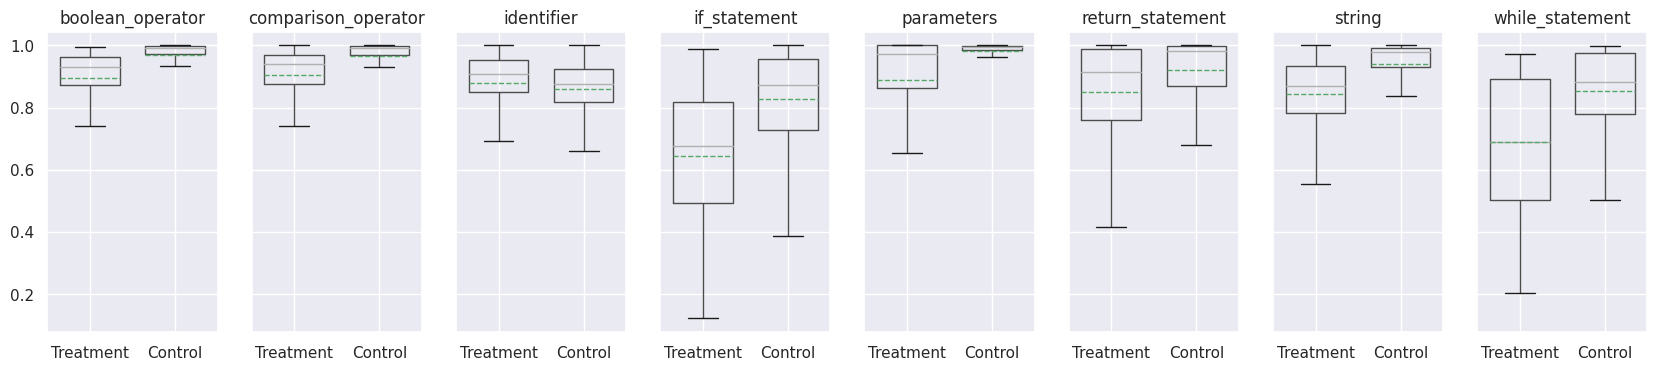

In [19]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element']].rename(
    columns={'mask_sorensen_dice': 'Treatment', 'mask_random_avg_sorensen_dice': 'Control'}).loc[~eval_df['ast_element'].isin(['for_in_clause', 'if_clause', 'for_statement'])].groupby('ast_element').boxplot(
    layout=(1, 8),
    figsize=(20,4), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

### All Metrics

In [20]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element','mask_sorensen_dice','mask_random_avg_sorensen_dice']].groupby('ast_element').describe()

mask_jaccard                                     \
                           count mean  std  min  25%  50%  75%  max   
ast_element                                                           
boolean_operator          551.00 0.83 0.15 0.15 0.77 0.87 0.93 0.99   
comparison_operator      2972.00 0.84 0.14 0.13 0.78 0.89 0.94 1.00   
for_in_clause             576.00 0.87 0.10 0.29 0.83 0.90 0.95 1.00   
for_statement             859.00 0.55 0.22 0.08 0.38 0.55 0.73 0.95   
identifier               7501.00 0.80 0.17 0.03 0.74 0.83 0.91 1.00   
if_clause                 125.00 0.90 0.08 0.51 0.86 0.92 0.96 1.00   
if_statement             2039.00 0.51 0.22 0.07 0.33 0.51 0.69 0.97   
parameters               7501.00 0.84 0.23 0.02 0.76 0.95 1.00 1.00   
return_statement         2897.00 0.77 0.23 0.05 0.61 0.84 0.98 1.00   
string                   5033.00 0.75 0.17 0.11 0.64 0.77 0.88 1.00   
while_statement            78.00 0.57 0.25 0.11 0.34 0.53 0.81 0.95   

                    mask_random_avg_jaccard       ...  \
                                      count mean  ...   
ast_element                                       ...   
boolean_operator                     551.00 0.95  ...   
comparison_operator                 2972.00 0.94  ...   
for_in_clause                        576.00 0.98  ...   
for_statement                        859.00 0.79  ...   
identifier                          7501.00 0.78  ...   
if_clause                            125.00 0.98  ...   
if_statement                        2039.00 0.74  ...   
parameters                          7501.00 0.97  ...   
return_statement                    2897.00 0.88  ...   
string                              5033.00 0.91  ...   
while_statement                       78.00 0.78  ...   

                    mask_random_avg_sorensen_dice                              \
                                              75%  max   count mean  std  min   
ast_element                                                                     
boolean_operator                             1.00 1.00  551.00 0.97 0.05 0.61   
comparison_operator                          1.00 1.00 2972.00 0.96 0.07 0.40   
for_in_clause                                1.00 1.00  576.00 0.99 0.03 0.75   
for_statement                                0.97 1.00  859.00 0.86 0.13 0.37   
identifier                                   0.92 1.00 7501.00 0.86 0.09 0.38   
if_clause                                    1.00 1.00  125.00 0.99 0.02 0.86   
if_statement                                 0.96 1.00 2039.00 0.83 0.15 0.25   
parameters                                   1.00 1.00 7501.00 0.98 0.04 0.53   
return_statement                             1.00 1.00 2897.00 0.92 0.12 0.23   
string                                       0.99 1.00 5033.00 0.94 0.09 0.14   
while_statement                              0.98 1.00   78.00 0.85 0.14 0.50   

                                         
                     25%  50%  75%  max  
ast_element                              
boolean_operator    0.97 0.99 1.00 1.00  
comparison_operator 0.97 0.99 1.00 1.00  
for_in_clause       0.99 1.00 1.00 1.00  
for_statement       0.79 0.91 0.97 1.00  
identifier          0.82 0.87 0.92 1.00  
if_clause           0.99 1.00 1.00 1.00  
if_statement        0.73 0.87 0.96 1.00  
parameters          0.98 1.00 1.00 1.00  
return_statement    0.87 0.98 1.00 1.00  
string              0.93 0.98 0.99 1.00  
while_statement     0.78 0.88 0.98 1.00  

[11 rows x 48 columns]

boolean_operator            AxesSubplot(0.1,0.559091;0.114286x0.340909)
comparison_operator    AxesSubplot(0.237143,0.559091;0.114286x0.340909)
for_in_clause          AxesSubplot(0.374286,0.559091;0.114286x0.340909)
for_statement          AxesSubplot(0.511429,0.559091;0.114286x0.340909)
identifier             AxesSubplot(0.648571,0.559091;0.114286x0.340909)
if_clause              AxesSubplot(0.785714,0.559091;0.114286x0.340909)
if_statement                    AxesSubplot(0.1,0.15;0.114286x0.340909)
parameters                 AxesSubplot(0.237143,0.15;0.114286x0.340909)
return_statement           AxesSubplot(0.374286,0.15;0.114286x0.340909)
string                     AxesSubplot(0.511429,0.15;0.114286x0.340909)
while_statement            AxesSubplot(0.648571,0.15;0.114286x0.340909)
dtype: object

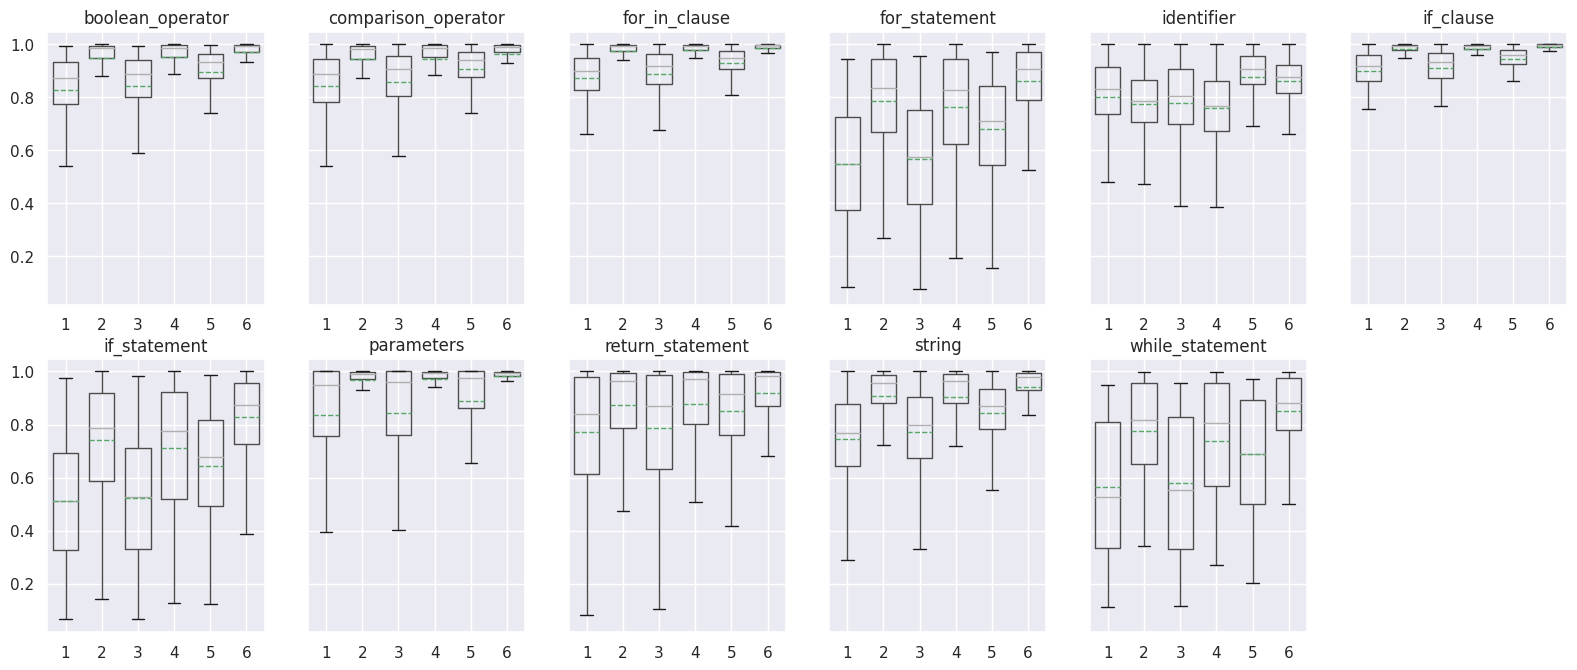

In [21]:
eval_df[['mask_jaccard','mask_random_avg_jaccard','mask_levenshtein','mask_random_avg_levenshtein','mask_sorensen_dice','mask_random_avg_sorensen_dice','ast_element',]].rename(
    columns={'mask_jaccard': '1', 'mask_random_avg_jaccard': '2','mask_levenshtein':'3','mask_random_avg_levenshtein':'4','mask_sorensen_dice':'5', 'mask_random_avg_sorensen_dice':'6'}).groupby('ast_element').boxplot(
    layout=(2, 6),
    figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )

## Data-Level Analysis

In [22]:
eval_df[['mask_jaccard','mask_random_avg_jaccard']].describe()

,mask_jaccard,mask_random_avg_jaccard
count,30132.00,30132.00
mean,0.78,0.88
std,0.21,0.15
min,0.02,0.08
25%,0.67,0.80
50%,0.83,0.95
75%,0.95,0.99
max,1.00,1.00


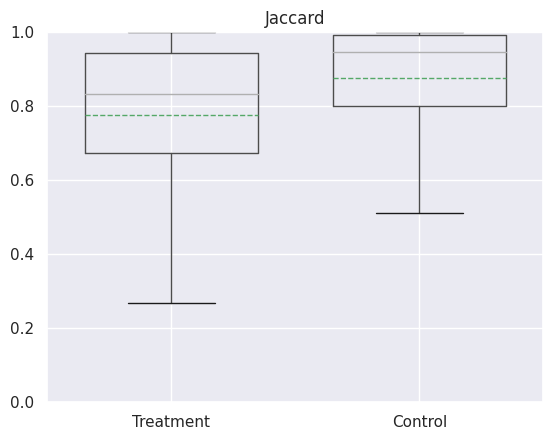

In [23]:
boxplot = eval_df[['mask_jaccard','mask_random_avg_jaccard']].rename(
    columns={'mask_jaccard': 'Treatment', 'mask_random_avg_jaccard': 'Control'}).boxplot( 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )
boxplot.plot()
plt.title('Jaccard')
plt.ylim(0,1)
plt.show()

In [24]:
eval_df[['mask_levenshtein','mask_random_avg_levenshtein']].describe()

,mask_levenshtein,mask_random_avg_levenshtein
count,30132.00,30132.00
mean,0.78,0.87
std,0.22,0.16
min,0.02,0.08
25%,0.68,0.79
50%,0.84,0.95
75%,0.96,0.99
max,1.00,1.00


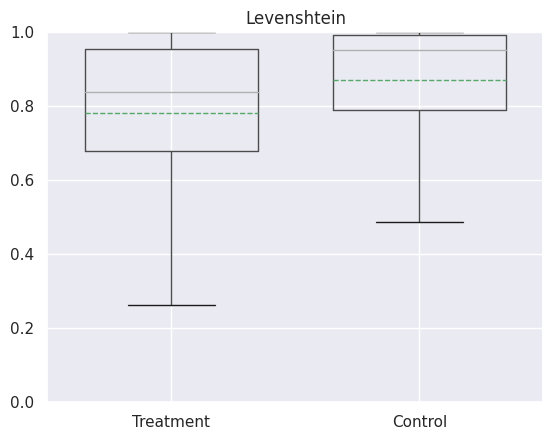

In [25]:
boxplot = eval_df[['mask_levenshtein','mask_random_avg_levenshtein']].rename(
    columns={'mask_levenshtein': 'Treatment', 'mask_random_avg_levenshtein': 'Control'}).boxplot(
    #layout=(2, 6),
    #figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7,
    )
boxplot.plot()
plt.title('Levenshtein')
plt.ylim(0,1)
plt.show()

In [26]:
eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice']].describe()

,mask_sorensen_dice,mask_random_avg_sorensen_dice
count,30132.00,30132.00
mean,0.85,0.92
std,0.17,0.10
min,0.04,0.14
25%,0.80,0.88
50%,0.91,0.97
75%,0.97,1.00
max,1.00,1.00


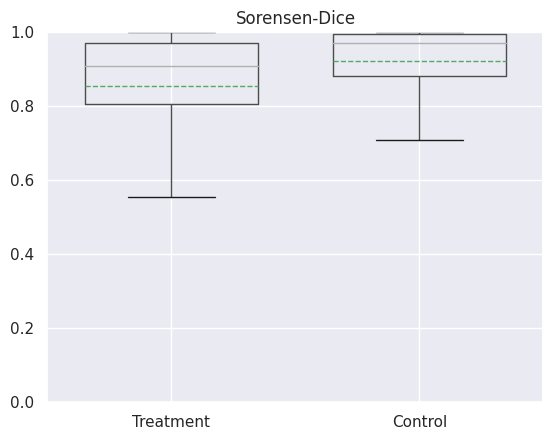

In [27]:
boxplot = eval_df[['mask_sorensen_dice','mask_random_avg_sorensen_dice']].rename(
    columns={'mask_sorensen_dice': 'Treatment', 'mask_random_avg_sorensen_dice': 'Control'}).boxplot(
    #layout=(2, 6),
    #figsize=(19,8), 
    bootstrap=500, 
    showfliers=False,
    showmeans=True, 
    meanline = True,
    widths = 0.7
    )
boxplot.plot()
plt.title('Sorensen-Dice')
plt.ylim(0,1)
plt.show()

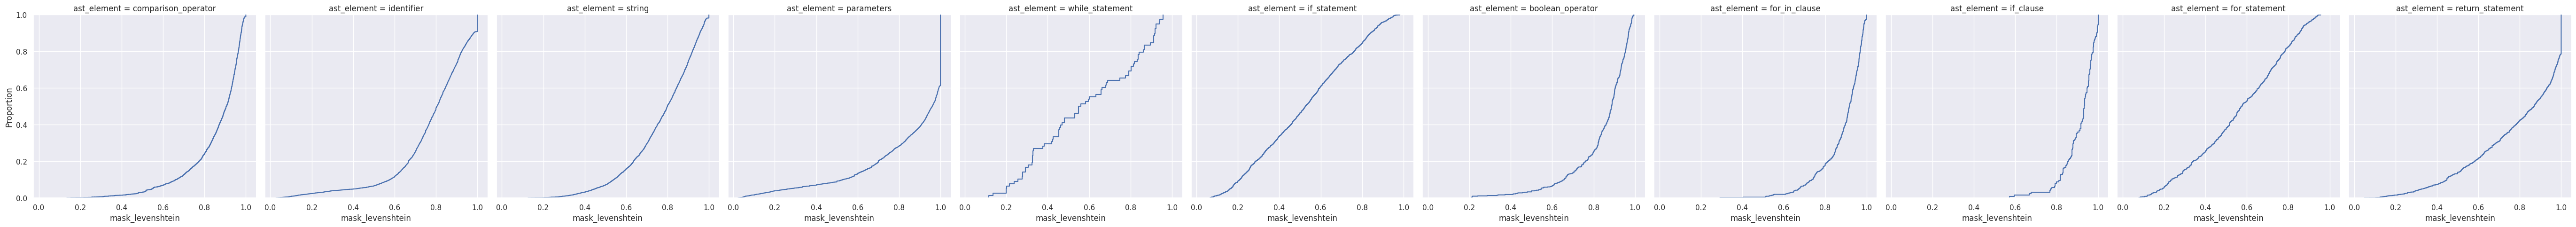

In [28]:
sns.displot(eval_df, x="mask_levenshtein", col="ast_element",kind="ecdf")

The ECDF plot has two key advantages. Unlike the histogram or KDE, it directly represents each datapoint. That means there is no bin size or smoothing parameter to consider. Additionally, because the curve is monotonically increasing, it is well-suited for comparing multiple distributions:

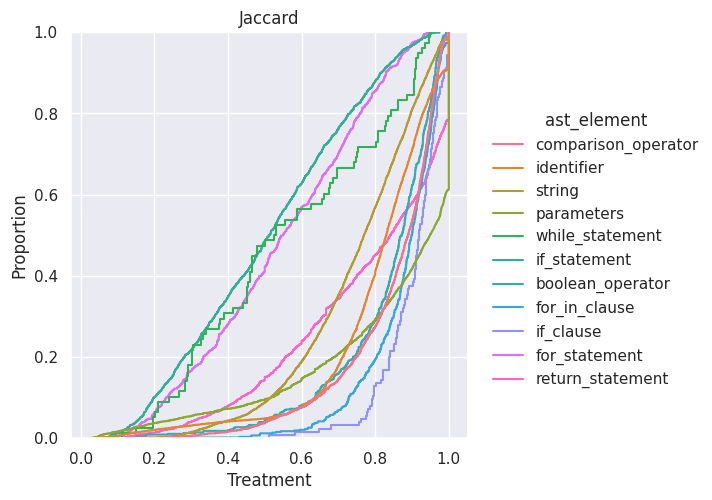

In [29]:
sns.displot(eval_df, x="mask_jaccard", hue="ast_element",kind="ecdf").set(title='Jaccard', xlabel='Treatment')

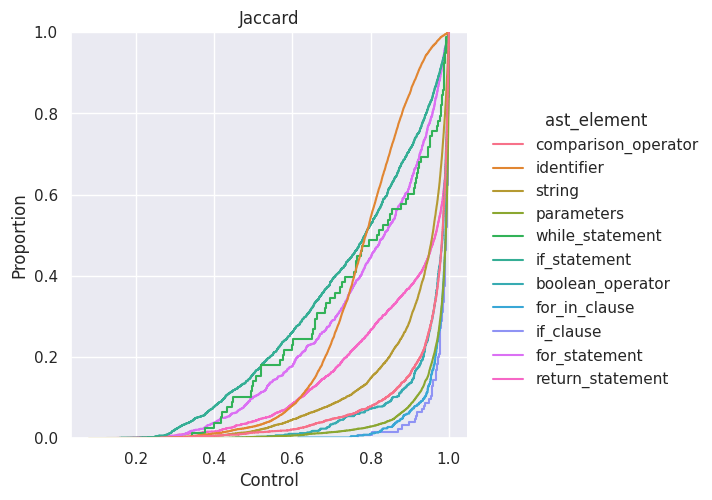

In [30]:
sns.displot(eval_df, x="mask_random_avg_jaccard", hue="ast_element",kind="ecdf").set(title='Jaccard', xlabel='Control')

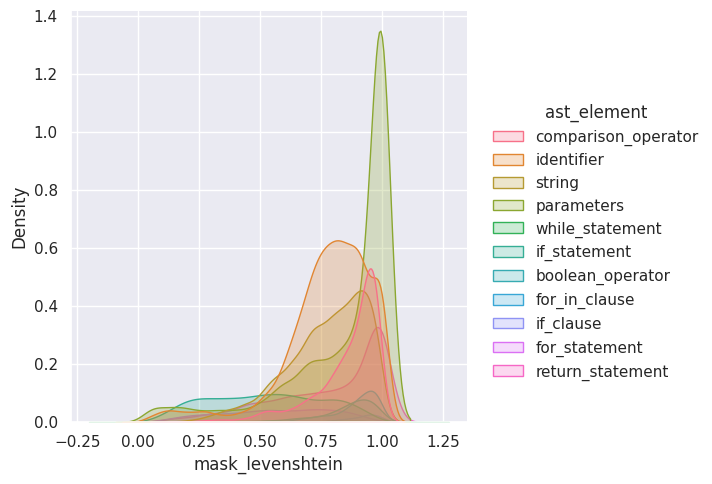

In [31]:
sns.displot(eval_df, x="mask_levenshtein", hue="ast_element", kind="kde", fill=True)
#log_scale=True,

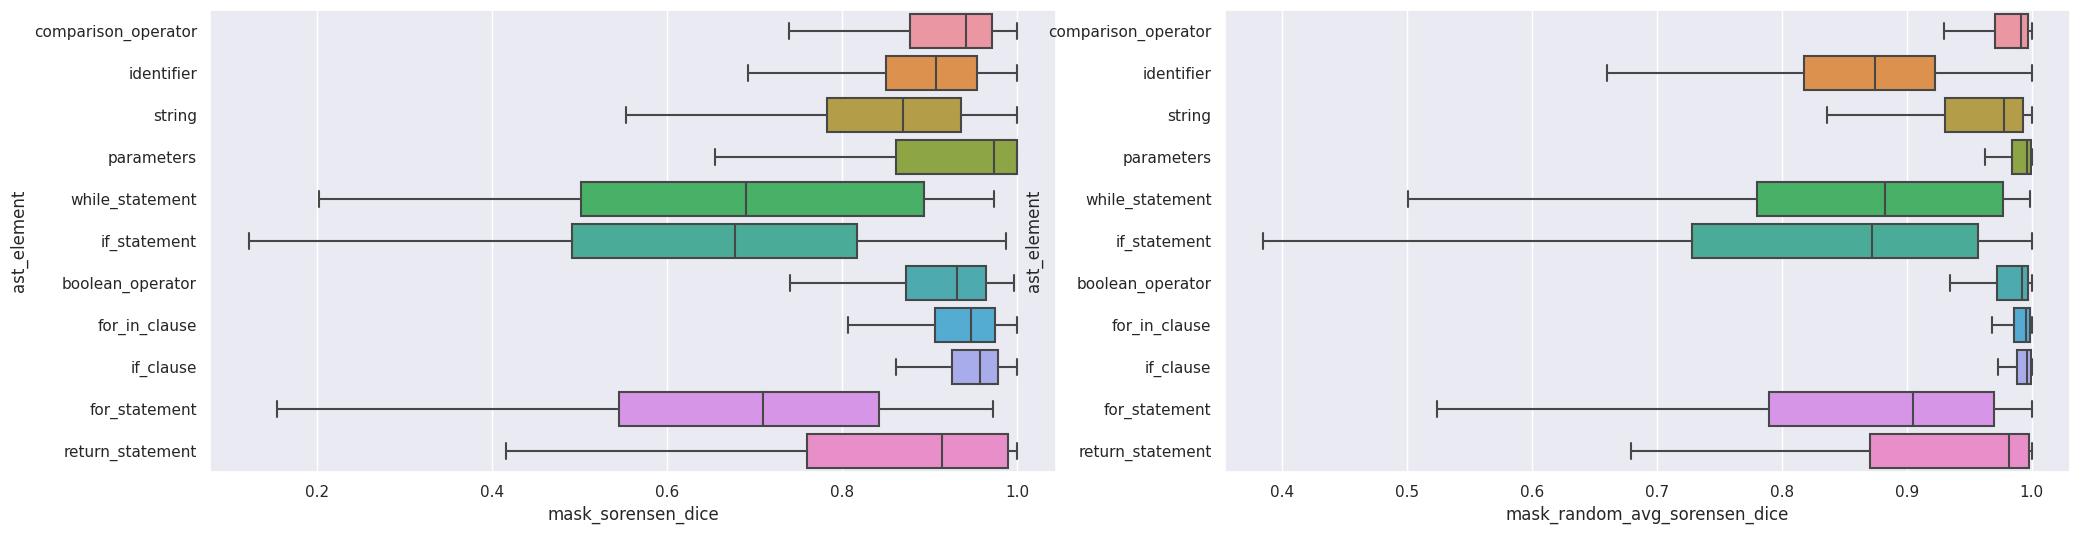

In [32]:
fig, axs = plt.subplots( figsize=(24,6), ncols=2 )
for i,key in enumerate(['mask_sorensen_dice','mask_random_avg_sorensen_dice']):
    #plt.figure(i)
    #sns.boxplot(data=df_method_size[key], showfliers=False,ax=axs[i]).set_title(key)
    sns.boxplot(data=eval_df, x=key,  y="ast_element", showfliers=False, ax=axs[i])

In [33]:
eval_df['mask_levenshtein'].g

AttributeError: 'Series' object has no attribute 'g'